In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker


import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import folium 
import json
import math
from math import radians, cos, sin, asin, sqrt
import itertools
import statistics as stats
from statistics import mean
from shapely.wkt import loads

import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import HeatMap

import bokeh
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, column
from ipywidgets import interact
from bokeh.models import ColumnDataSource, FactorRange, Select, CustomJS
from bokeh.plotting import output_file, save, figure, show

from bokeh.layouts import gridplot, column
from bokeh.models import ColumnDataSource, Select, Div
from bokeh.plotting import figure, curdoc
from bokeh.io import show
from bokeh.palettes import Category20
from math import ceil
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Category10
from bokeh.transform import dodge
import calendar
from bokeh.models import Div
from bokeh.layouts import column
from bokeh.models import HoverTool
from bokeh.models import Range1d
from bokeh.models import NumeralTickFormatter
from bokeh.models import Label


import folium
from folium import FeatureGroup, LayerControl, Marker, Popup, Icon
from folium.plugins import HeatMap



output_notebook()

from folium import plugins

# Set global font
plt.rcParams['font.family'] = 'Georgia'  # Use 'sans-serif', 'monospace', 'cursive', etc.
plt.rcParams['font.size'] = 10  # Adjust font size
plt.rcParams['font.weight'] = 'normal'  # Options: 'light', 'normal', 'bold'
print('Pretty :)')

print('All imported!')

Loading BokehJS ...

Pretty :)
All imported!


In [2]:
data_2016 = pd.read_excel('2016_cycling_survey_data_only.xlsx')
data_2022 = pd.read_excel('2022_cycling_survey_data_only.xlsx')

In [ ]:
#saving interesting data.
do_you_cycle = pd.DataFrame() #1 Not at all, 2/3/4 different sections of the year
do_you_cycle['2016'] = data_2016['Aq2']
do_you_cycle['2022'] = data_2022['Aq2']

how_safe = pd.DataFrame() #1	Safe / 2	Quite safe / 3	Quite unsafe / 4	Unsafe / 5	Don't know
how_safe['2016'] = data_2016['Aq7']
how_safe['2022'] = data_2022['Aq7']



with_public_transport = pd.DataFrame() #1	Safe / 2	Quite safe / 3	Quite unsafe / 4	Unsafe / 5	Don't know
with_public_transport['2016'] = data_2016['Aq12']
with_public_transport['2022'] = data_2022['Aq12']

why_not_cycle = pd.DataFrame() #4 Safety / 5 Preference (public transport, walking, car) / 8 Poor planning
why_not_cycle['2016'] = data_2016['Aq21']
why_not_cycle['2022'] = data_2022['Aq22']

if_better_infra = pd.DataFrame() #1 Yes / 2 No
if_better_infra['2016'] = data_2016['Aq22N1']
if_better_infra['2022'] = data_2022['Aq23N1']

if_safer = pd.DataFrame() #1 Yes / 2 No
if_safer['2016'] = data_2016['Aq22N4']
if_safer['2022'] = data_2022['Aq23N4']

do_you_own_a_bike = pd.DataFrame()
do_you_own_a_bike['2016'] = data_2016['Aj'] #1 No / 2 One / 3 Two / 4 Three or more
do_you_own_a_bike['2022'] = data_2022['Atj'] #1 No / 2 One / 3 Two / 4 Three or more
do_you_own_a_bike['2022 (ebike)'] = data_2022['Atk'] #1 No / 2 Considering / 3 Yes, one / 4 Yes, more than one


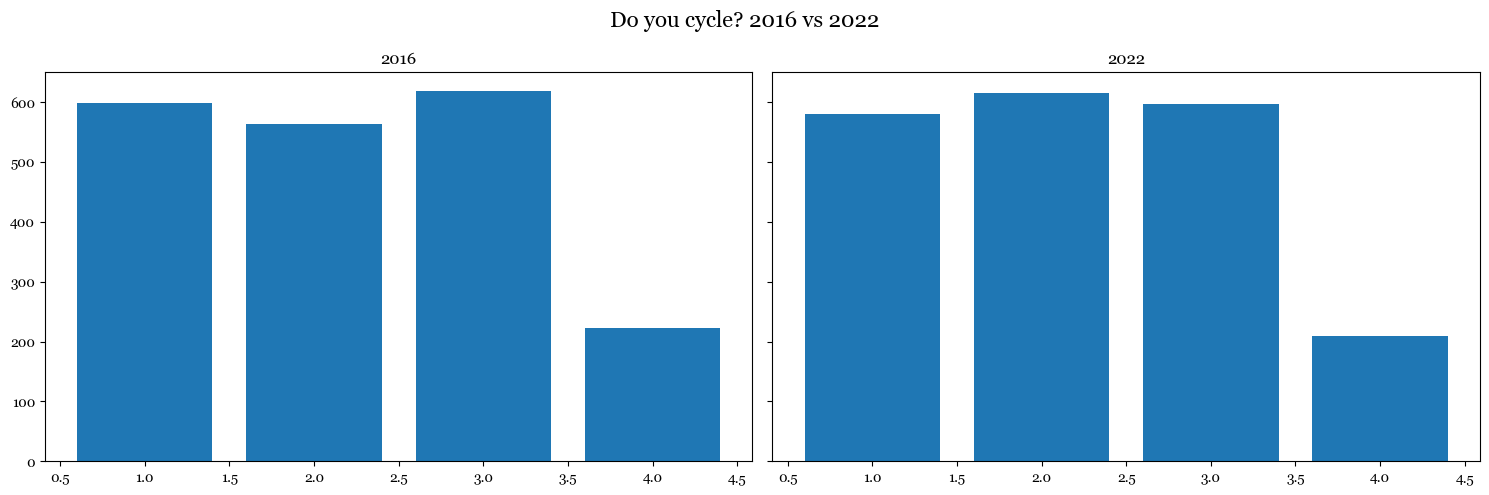

In [53]:
#Do you cycle?
do_you_cycle_summary = pd.DataFrame()
do_you_cycle_summary['Categories'] = [1, 2, 3, 4]

#counting
counts_2016 = do_you_cycle['2016'].value_counts().reset_index().sort_values(by='2016').reset_index(drop=True)
counts_2022 = do_you_cycle['2022'].value_counts().reset_index().sort_values(by='2022').reset_index(drop=True)

#saving
do_you_cycle_summary['2016'] = counts_2016['count']
do_you_cycle_summary['2022'] = counts_2022['count']

do_you_cycle_summary

#plot = do_you_cycle_summary.plot(x = 'Categories', y = '2016', kind = 'bar', legend = False)
#plt.title('2016')


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
axes = axes.flatten()

axes[0].bar(do_you_cycle_summary['Categories'], do_you_cycle_summary['2016'])
axes[0].set_title('2016')

axes[1].bar(do_you_cycle_summary['Categories'], do_you_cycle_summary['2022'])
axes[1].set_title('2022')

fig.suptitle(f'Do you cycle? 2016 vs 2022', fontsize=16)
plt.tight_layout()
plt.show()